Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.8184546136534133
Random Forest Confusion Matrix:
[[1983  671]
 [ 297 2381]]
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.80      2654
         1.0       0.78      0.89      0.83      2678

    accuracy                           0.82      5332
   macro avg       0.82      0.82      0.82      5332
weighted avg       0.82      0.82      0.82      5332

KNN Accuracy Score: 0.6249062265566392
KNN Confusion Matrix:
[[1851  803]
 [1197 1481]]
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.70      0.65      2654
         1.0       0.65      0.55      0.60      2678

    accuracy                           0.62      5332
   macro avg       0.63      0.63      0.62      5332
weighted avg       0.63      0.62      0.62      5332

XGBoost Accuracy Score: 0.6712303075768942
XGBoost Co

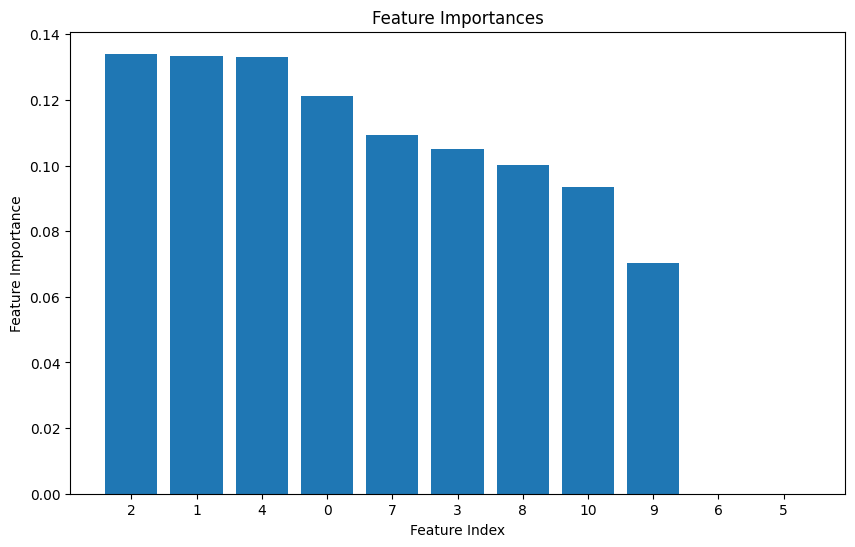

Random Forest Test Accuracy (Loaded Model): 0.8184546136534133


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from joblib import dump, load

# Read the dataset
df = pd.read_csv('C:/Users/Yash Bhandare/Downloads/NewDiabetespatient4_data.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful information from the date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop unnecessary columns
columns_to_drop = ['Patient ID', 'Patient Name', 'Gender (0: Male, 1: Female)', 'Age',
                   'Family History (0: No, 1: Yes)', 'Lipid Profile (Normal/Abnormal)',
                   'Physical Activity', 'Referred By', 'Lab', 'Date']
df.drop(columns=columns_to_drop, inplace=True)

# Replace zeros with NaN in selected columns
columns_to_replace = ['BMI', 'FBG', '2 HOUR POSTPRANDIAL GLUCOSE', 'HbA1c', 'Urine Microalbumin',
                      'Urine Glucose (0: Normal, 1: Abnormal)', 'Urine Ketones (0: Normal, 1: Abnormal)',
                      'Diabetes Status (0: Non-Diabetic, 1: Pre-Diabetic, 2: Diabetic)',
                      'Systolic BP', 'Diastolic BP']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.NaN)

# Fill missing values with mode
df.fillna(df.mode().iloc[0], inplace=True)

# Splitting features and the target variable
X = df.drop(columns=['Diabetes Status (0: Non-Diabetic, 1: Pre-Diabetic, 2: Diabetic)'])
y = df['Diabetes Status (0: Non-Diabetic, 1: Pre-Diabetic, 2: Diabetic)']

# Convert target variable to integer classes starting from 0
y = y - 1

# Apply oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Predictions and evaluation
rfc_train = rfc.predict(X_train)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rfc_train))

predictions = rfc.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, predictions))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, predictions))

# Initialize and fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions and evaluation
knn_pred = knn.predict(X_test)
print("KNN Accuracy Score:", accuracy_score(y_test, knn_pred))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))



# Initialize and fit the XGBClassifier
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
predictions = xgb_model.predict(X_test)
print("XGBoost Accuracy Score:", accuracy_score(y_test, predictions))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("XGBoost Classification Report:")
print(classification_report(y_test, predictions))

# Initialize and fit the LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predictions and evaluation
predictions = logistic_regression_model.predict(X_test)
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, predictions))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, predictions))

# Initialize and fit the SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predictions and evaluation
svc_pred = svc_model.predict(X_test)
print("SVM Accuracy Score:", accuracy_score(y_test, svc_pred))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svc_pred))

print("SVM Classification Report:")
print(classification_report(y_test, svc_pred))

# Initialize and fit the GaussianNB model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions and evaluation
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy Score:", accuracy_score(y_test, nb_pred))

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

# Initialize and fit the GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predictions and evaluation
predictions = gb_model.predict(X_test)
print("Gradient Boosting Accuracy Score:", accuracy_score(y_test, predictions))

print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, predictions))

# Feature importance visualization
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()

# Save the trained RandomForestClassifier model using joblib
dump(rfc, 'random_forest_model.joblib')

# Load the saved model from joblib
loaded_model = load('random_forest_model.joblib')

# Predict using the loaded model
predictions_loaded_model = loaded_model.predict(X_test)
print("Random Forest Test Accuracy (Loaded Model):", accuracy_score(y_test, predictions_loaded_model))











In [2]:
import os
# Get the directory where the joblib file is stored
joblib_directory = os.path.dirname(os.path.abspath('random_forest_model.joblib'))

# Print the directory where the joblib file is stored
print("Joblib File Directory:", joblib_directory)


Joblib File Directory: c:\Users\Yash Bhandare\.vscode\python\model code version 3
